Regularization - (L1 and L2)

In [3]:
pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [4]:
#Machine learning package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend

#Deep learning package
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam   # to define learning rate

from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

In [5]:
x, y =make_moons(100, noise=0.25, random_state=2)

In [6]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

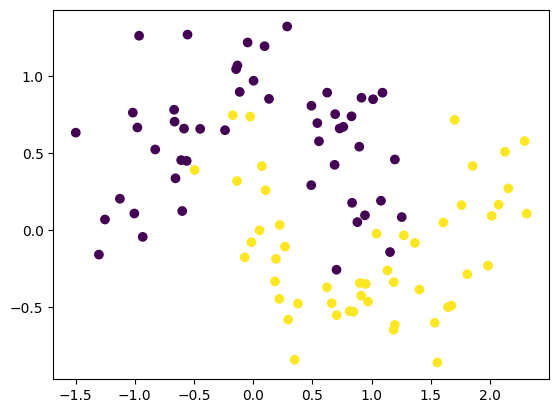

In [7]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

CASE 1 : Without Regularization

In [8]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation = 'relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [9]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss = 'binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x, y, validation_split=0.2, verbose=1, epochs=2000)

Epoch 1/2000
3/3 [==============================] - 3s 109ms/step - loss: 0.6087 - accuracy: 0.6375 - val_loss: 0.3652 - val_accuracy: 0.9000
Epoch 2/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.4123 - accuracy: 0.8500 - val_loss: 0.2135 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.3844 - accuracy: 0.8250 - val_loss: 0.2204 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.3882 - accuracy: 0.8500 - val_loss: 0.2735 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.3677 - accuracy: 0.8500 - val_loss: 0.2620 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 21ms/step - loss: 0.3529 - accuracy: 0.8500 - val_loss: 0.2349 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.3430 - accuracy: 0.8375 - val_loss: 0.1992 - val_accuracy: 0.9000
Epoch 8/2000

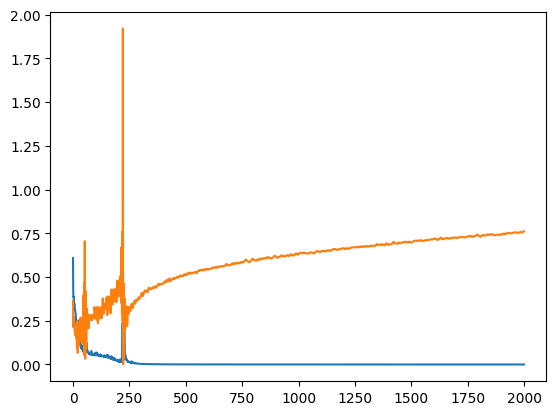

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

9600/9600 [==============================] - 15s 2ms/step


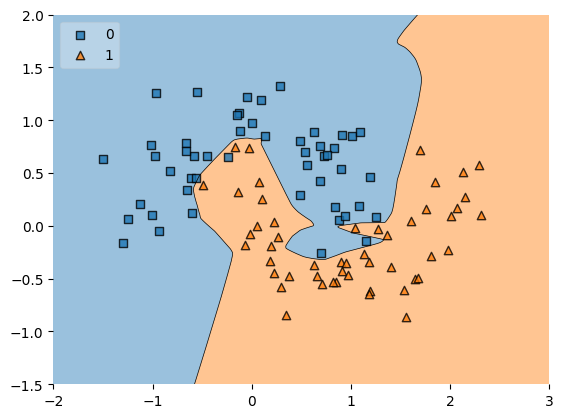

In [12]:
plot_decision_regions(x, y.astype('int'), clf=model, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

Case 2 : With Regularization

In [13]:
model1 = Sequential()
model1.add(Dense(128, input_dim=2, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model1.add(Dense(128, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model1.add(Dense(1, activation = 'sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [14]:
adam = Adam(learning_rate=0.01)
model1.compile(optimizer=adam, loss = 'binary_crossentropy', metrics=['accuracy'])

In [15]:
history1 = model1.fit(x, y, validation_split=0.2, verbose=1, epochs=2000)

Epoch 1/2000
3/3 [==============================] - 1s 98ms/step - loss: 4.0831 - accuracy: 0.7000 - val_loss: 2.7313 - val_accuracy: 0.8500
Epoch 2/2000
3/3 [==============================] - 0s 18ms/step - loss: 2.3818 - accuracy: 0.7375 - val_loss: 1.5580 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 17ms/step - loss: 1.3771 - accuracy: 0.8000 - val_loss: 0.9130 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.8647 - accuracy: 0.8000 - val_loss: 0.5922 - val_accuracy: 0.9000
Epoch 5/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.6838 - accuracy: 0.8000 - val_loss: 0.5176 - val_accuracy: 0.9000
Epoch 6/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.6281 - accuracy: 0.8250 - val_loss: 0.5950 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.6622 - accuracy: 0.8125 - val_loss: 0.5217 - val_accuracy: 0.9000
Epoch 8/2000


9600/9600 [==============================] - 16s 2ms/step


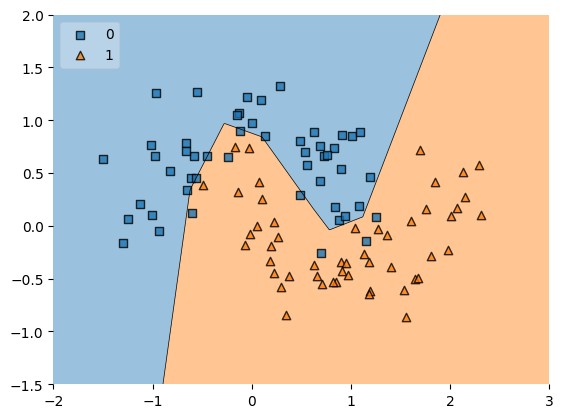

In [16]:
plot_decision_regions(x,y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show() 

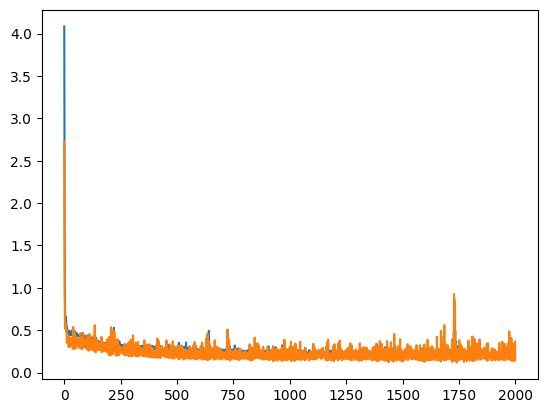

In [17]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [20]:
model1_weight_layer1 = model.get_weights()[0].reshape(256)  #without Regularization
model2_weight_layer1 = model1.get_weights()[0].reshape(256)  #with Regularization


<Axes: >

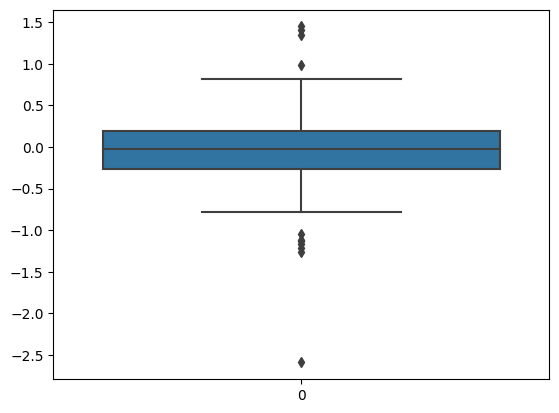

In [19]:
sns.boxplot(model1_weight_layer1)  # without Regularization

<Axes: >

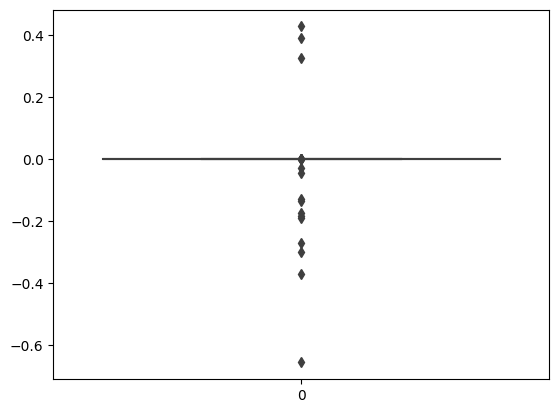

In [21]:
sns.boxplot(model2_weight_layer1)  # With Regularization

In [22]:
model1_weight_layer1.min()

-2.5904057

In [23]:
model1_weight_layer1.max()

1.4487822

In [24]:
model2_weight_layer1.min()

-0.6561112

In [25]:
model2_weight_layer1.max()

0.42793885

In [ ]:
# we can say from the above that model2 is better

<ipython-input-26-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-26-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

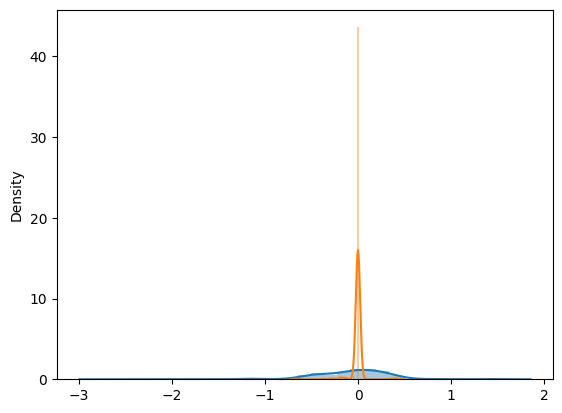

In [26]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

BATCH NORMALIZATION

In [27]:
from keras.layers import BatchNormalization

In [28]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Deep learning package
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam   # to define learning rate

from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

In [29]:
x, y =make_moons(100, noise=0.25, random_state=2)

In [30]:
model2 = Sequential()
model2.add(Dense(128, input_dim=2, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(128, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(1, activation = 'sigmoid'))
adam = Adam(learning_rate=0.01)
model2.compile(optimizer=adam, loss = 'binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x, y, validation_split=0.2, verbose=1, epochs=2000)

Epoch 1/2000
3/3 [==============================] - 2s 120ms/step - loss: 4.3907 - accuracy: 0.6750 - val_loss: 3.5120 - val_accuracy: 1.0000
Epoch 2/2000
3/3 [==============================] - 0s 18ms/step - loss: 3.0515 - accuracy: 0.8625 - val_loss: 2.7182 - val_accuracy: 0.9000
Epoch 3/2000
3/3 [==============================] - 0s 19ms/step - loss: 2.3580 - accuracy: 0.8250 - val_loss: 2.1035 - val_accuracy: 0.9000
Epoch 4/2000
3/3 [==============================] - 0s 21ms/step - loss: 1.7337 - accuracy: 0.8625 - val_loss: 1.6904 - val_accuracy: 0.8500
Epoch 5/2000
3/3 [==============================] - 0s 27ms/step - loss: 1.2452 - accuracy: 0.9500 - val_loss: 1.4405 - val_accuracy: 0.8500
Epoch 6/2000
3/3 [==============================] - 0s 28ms/step - loss: 1.0482 - accuracy: 0.9125 - val_loss: 1.2684 - val_accuracy: 0.9000
Epoch 7/2000
3/3 [==============================] - 0s 19ms/step - loss: 0.8649 - accuracy: 0.9125 - val_loss: 1.1480 - val_accuracy: 0.9000
Epoch 8/2000

In [ ]:
# Batch Normalization is a method intended to mitigate internal covariate shift for neural network

# we define Internal covariate shift as the change in the distribution of network activities due to change in network paramenters during training.